# 7.2. AR, MA, ARMA, ARIMA

In [41]:
 from pandas import read_csv, datetime, DataFrame
 from statsmodels.tsa.arima_model import ARIMA
 from matplotlib import pyplot

<ipython-input-41-47949f785761>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import read_csv, datetime, DataFrame


In [45]:
 def parser(x): # 시간을 표현하는 함수 정의
    return datetime.strptime("199"+x, "%Y-%m")
 series = read_csv("/content/sales.csv", header=0, parse_dates=[0], index_col=0,
                   squeeze=True, date_parser=parser)

<ipython-input-45-44424cf9ec61>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("/content/sales.csv", header=0, parse_dates=[0], index_col=0,


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 02 Aug 2023   AIC                            411.302
Time:                        15:20:39   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

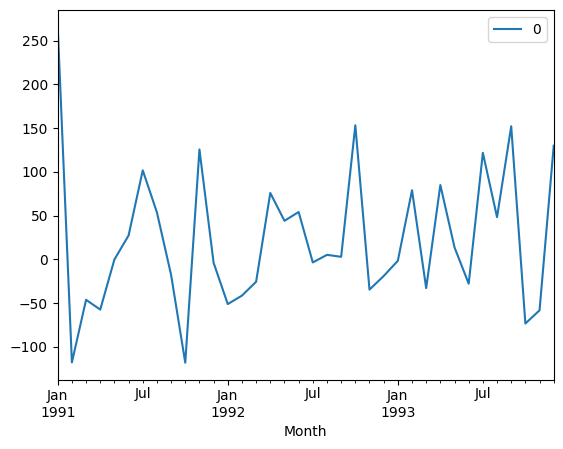

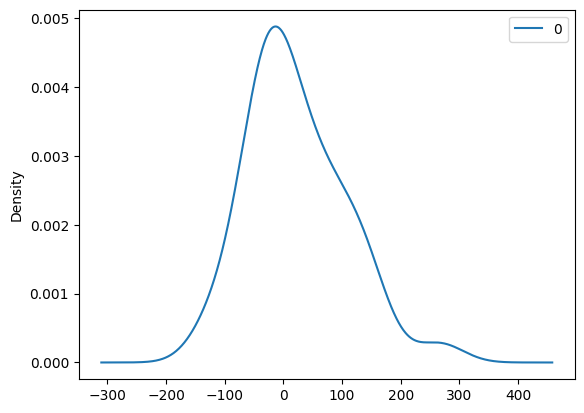

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [50]:
 ## 교재에서 사용된 코드는 명령어가 사라진 버전이라, 아래 두 줄과 같이 해야 함

 import statsmodels.api as sm
 model = sm.tsa.arima.ARIMA(series, order=(5,1,0))
 print(model.fit().summary())
 residuals = DataFrame(model.fit().resid)
 residuals.plot()
 pyplot.show()
 residuals.plot(kind='kde')
 pyplot.show()
 print(residuals.describe())

In [52]:
# (코드 7-2) sales 데이터셋 예측
import numpy as np
from pandas import read_csv, datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-52-60f0eefeb90a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import read_csv, datetime


<ipython-input-65-fed76e664b35>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("/content/sales.csv", header=0, parse_dates=[0], index_col=0,


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070405, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916190, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
TEST MSE:9118.818


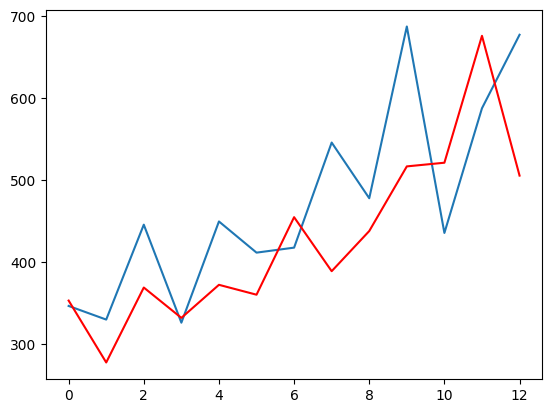

In [65]:
import statsmodels.api as sm

def parser(x): # 시간을 표현하는 함수 정의
    return datetime.strptime("199"+x, "%Y-%m")
series = read_csv("/content/sales.csv", header=0, parse_dates=[0], index_col=0,
                   squeeze=True, date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
  model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
  fitted = model.fit()
  output = fitted.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print("predicted=%f, expected=%f" %(yhat, obs))
error = mean_squared_error(test, predictions)
print("TEST MSE:%.3f" %error)
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()

# LSTM

#### LSTM 셀 구현
* MNIST 데이터셋 사용

In [36]:
# (코드 7-29) 라이브러리 호출
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter # 파라미터 목록을 가지고 있는 라이브러리 (패키지)
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [37]:
# (코드 7-30) 데이터 전처리 >> 평균, 표준 편차에 맞게 데이터를 정규화하기 위한 코드
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,)) # 평균을 0.5, 표준편차를 1.0으로 데이터 정규화 (데이터 분포 조정)
])

In [38]:
# (코드 7-31) MNIST 데이터셋 내려받음
from torchvision.datasets import MNIST

download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [39]:
# (코드 7-32) 데이터셋을 메모리로 가져오기
batch_size = 64
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [40]:
# (코드 7-33) 변수 값 지정
# 배치 크기 및 에포크 등 변수에 대한 값 지정

batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [41]:
# (코드 7-34) LSTM 셀 네트워크 구축
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias)
        self.reset_parameters()

    # 모델의 파라미터 초기화
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))

        gates = self.x2h(x) + self.h2h(hx)
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)

        ingate = F.sigmoid(ingate) # input 게이트에 '시그모이드 활성화 함수' 적용
        forgetgate = F.sigmoid(forgetgate) # forget gate에 시그모이드 활성화 함수 적용
        cellgate = F.tanh(cellgate) # cell gate에 'tanh 함수' 적용
        outgate = F.sigmoid(outgate) # output gate에 '시그모이드 활성화 함수' 적용

        # 하나의 LSTM 셀을 통과하면 Ct와 ht가 출력으로 주어짐
        cy = torch.mul(cx, forgetgate) +  torch.mul(ingate, cellgate)
        hy = torch.mul(outgate, F.tanh(cy))
        return (hy, cy)

In [42]:
# (코드 7-35) LSTM 셀 전반적인 네트워크
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim # 은닉층의 뉴런/유닛 개수

        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim) # 위에서 정의한 함수 불러오는 부분
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if torch.cuda.is_available(): # GPU 사용 여부 확인
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        if torch.cuda.is_available(): # GPU 사용 여부 확인
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))

        outs = []
        cn = c0[0,:,:] # (은닉층 계층 개수, 배치 크기, 은닉층 뉴런 개수) 크기를 갖는 cell state 텐서
        hn = h0[0,:,:]  # (은닉층 계층 개수, 배치 크기, 은닉층 뉴런 개수) 크기를 갖는 hidden state 텐서

        # LSTM 셀 계층을 반복해서 쌓아 올림
        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)

        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [43]:
# (코드 7-36) 옵티마이저 & 손실 함수 지정
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available(): # GPU 사용 여부 확인
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [44]:
# (코드 7-37) 모델 학습 및 성능 확인
# train data set으로 모델 학습
# validation data set으로 모델 성능 확인

seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # 훈련 데이터셋을 이용한 모델 학습
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels) # 손실 함수를 이용하여 오차 계산

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step() # 파라미터 업데이트
        loss_list.append(loss.item())
        iter += 1

        if iter % 500 == 0: # 정확도 계산 (accuracy)
            correct = 0
            total = 0
            for images, labels in valid_loader: # 검증 데이터셋을 이용하여 모델 성능 검증
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1) # 모델을 통과한 결과의 최댓값으로부터 예측 결과 가져오기

                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.237457513809204. Accuracy: 21.420000076293945
Iteration: 1000. Loss: 0.8865489363670349. Accuracy: 75.66000366210938
Iteration: 1500. Loss: 0.36925092339515686. Accuracy: 89.68000030517578
Iteration: 2000. Loss: 0.22741778194904327. Accuracy: 93.22000122070312
Iteration: 2500. Loss: 0.04691021144390106. Accuracy: 95.62999725341797
Iteration: 3000. Loss: 0.05541188269853592. Accuracy: 95.95999908447266
Iteration: 3500. Loss: 0.08951079845428467. Accuracy: 96.51000213623047
Iteration: 4000. Loss: 0.02204427309334278. Accuracy: 96.95999908447266
Iteration: 4500. Loss: 0.07599193602800369. Accuracy: 96.76000213623047
Iteration: 5000. Loss: 0.05491260439157486. Accuracy: 97.11000061035156
Iteration: 5500. Loss: 0.16436734795570374. Accuracy: 96.5199966430664
Iteration: 6000. Loss: 0.01572381891310215. Accuracy: 97.20999908447266
Iteration: 6500. Loss: 0.01401564758270979. Accuracy: 97.88999938964844
Iteration: 7000. Loss: 0.01943875104188919. Accuracy: 97.91999816894

In [45]:
# (코드 7-38) test data set을 이용하여 모델 예측 성능 확인
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)

        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = "sum") # reduction을 sum으로 지정했으므로, 모든 오차를 더함
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [46]:
# (코드 7-39) 테스트 데이터셋을 이용하여 모델 예측 성능 확인
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

# 비록 IMDB에서 MNIST 데이터셋으로 바뀌기는 했지만, 98%로 성능이 매우 좋음

Test Loss:  0.07 | Test Accuracy:  0.98


#### LSTM 계층 구현
* 스타벅스 주가 데이터셋 사용
* 모델이 얼마나 주가 예측을 잘 하는지에 대해 알아보기 위함

In [20]:
# (코드 7-40) 라이브러리 호출
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [21]:
# (코드 7-41) 데이터셋 가져오기
# /content/SBUX.csv
data=pd.read_csv('/content/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [22]:
# (코드 7-42) date 칼럼을 인덱스로 사용함
# 이번에 사용할 데이터들은 '숫자'이기 때문에 임베딩이 필요하지 않음
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [23]:
# (코드 7-43) Volumn 칼럼이 int인데, float로 data type 변경 (astype 함수() 사용)
data['Volume'] = data['Volume'].astype(float)

In [26]:
# (코드 7-44) 데이터 셋을 훈련/정답(레이블)으로 분리
X=data.iloc[:,:-1] # 마지막 칼럼을 제외한 모든 칼럼을 x로 사용
y=data.iloc[:,5:6] # 마지막 volume을 레이블로 사용
print(X)
print("--------------------------------------------------")
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
--------------------------------------------------
  

In [27]:
# (코드 7-45) 데이터 분포 조정
# 데이터셋에서 데이터 간의 분포가 다르게 나타나고 있음
# 분포를 고르게 맞추기 위한 과정

ms = MinMaxScaler() # 데이터의 모든 값이 0~1 사이에 존재하도록 분산 조정
ss = StandardScaler() # 데이터가 평균=0, 분산=1이 되도록 분산 조정

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :] # 훈련 데이터셋
X_test = X_ss[200:, :] # 테스트 데이터셋

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [28]:
# (코드 7-46) 데이터셋의 형태 및 크기 조정
# 모든 데이터셋은 그 자체로 네트워크게 보낼 수 없음
# 네트워크에서 정의된 형태 및 크기에 따라 데이터셋 크기를 조정한 후 네트워크로 보내야 함

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

# 출력 결과: 훈련, 테스트 데이터셋의 형태가 변경된 결과임

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [29]:
# (코드 7-47) LSTM 네트워크
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [30]:
# (코드 7-48) 변수 값 설정
num_epochs = 1000 # 에포크 횟수: 1000번
learning_rate = 0.0001 # 학습률: 0.0001

input_size = 5 # 입력 데이터셋의 칼럼 수
hidden_size = 2 # hidden state 수
num_layers = 1 # LSTM 계층 수

num_classes = 1
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
# (코드 7-49) 모델 학습
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.18287
Epoch: 100, loss: 0.05713
Epoch: 200, loss: 0.03855
Epoch: 300, loss: 0.03717
Epoch: 400, loss: 0.03599
Epoch: 500, loss: 0.03326
Epoch: 600, loss: 0.02937
Epoch: 700, loss: 0.02517
Epoch: 800, loss: 0.02214
Epoch: 900, loss: 0.02043


In [32]:
# 위의 결과는 오차 위주로 출력했으므로, 실제로 얼마나 잘 예측했는지 알기 어려움
# 예측 결과 >> 시각적으로 표현 >> 레이블, 예측 결과 출력하기 위한 전처리(데이터 분포 및 형태 변경) 진행

# (코드 7-50) 모델 예측 결과를 출력하기 위한 데이터 크기 재구성
df_x_ss = ss.transform(data.iloc[:, :-1]) # 데이터 정규화 (분포 조정)
df_y_ms = ms.transform(data.iloc[:, -1:]) # 데이터 정규화

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

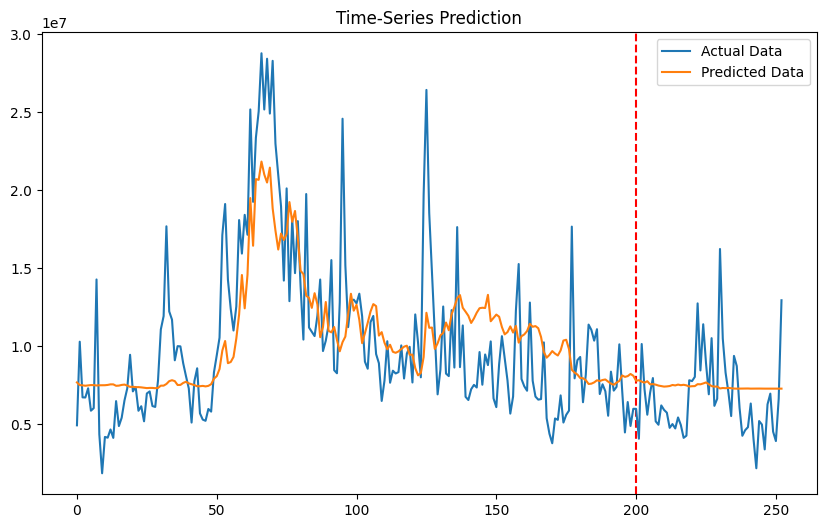

In [33]:
# (코드 7-51) 모델 예측 결과 출력
# 전처리가 진행된 데이터를 그래프로 출력
train_predict = model(df_x_ss) # 훈련 데이터셋을 모델에 적용하여 모델 학습
predicted = train_predict.data.numpy() # 모델 학습 결과를 numpy로 변경
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted) # 모델 학습을 위해 전처리 했던 것을 해제
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) # 그래프로 표시
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# 7.6. GRU (Gated Recurrent Unit)

#### GRU 셀 구현
* MNIST 데이터셋 사용

In [2]:
# (코드 7-52) 라이브러리 호출
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [3]:
# (코드 7-53) 데이터 전처리
# 데이터셋을 평균 & 표준편차를 기준으로 정규화
# 텐서로 변경
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

In [4]:
# (코드 7-54) 데이터셋 내려받기 및 전처리 적용
from torchvision.datasets import MNIST

download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 124333369.95it/s]


Extracting ../chap07/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../chap07/MNIST_DATASET/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 82293270.26it/s]


Extracting ../chap07/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../chap07/MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38203856.89it/s]

Extracting ../chap07/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../chap07/MNIST_DATASET/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15602398.66it/s]


Extracting ../chap07/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap07/MNIST_DATASET/MNIST/raw



In [5]:
# (코드 7-55) 데이터셋 메모리로 가져오기
batch_size = 64
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [6]:
# (코드 7-56) 변수 값 설정
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [7]:
# (코드 7-57) GRU 셀 네트워크
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 3 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 3 * hidden_size, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, x, hidden):
        x = x.view(-1, x.size(1))

        gate_x = self.x2h(x)
        gate_h = self.h2h(hidden)

        gate_x = gate_x.squeeze()
        gate_h = gate_h.squeeze()

        i_r, i_i, i_n = gate_x.chunk(3, 1)
        h_r, h_i, h_n = gate_h.chunk(3, 1)

        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_i + h_i)
        newgate = F.tanh(i_n + (resetgate * h_n))

        hy = newgate + inputgate * (hidden - newgate)
        return hy

In [8]:
# (코드 7-58) 전반적인 네트워크 구조
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.gru_cell = GRUCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        outs = []
        hn = h0[0,:,:]

        for seq in range(x.size(1)):
            hn = self.gru_cell(x[:,seq,:], hn)
            outs.append(hn)

        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [9]:
# (코드 7-59) 옵티마이저와 손실 함수 설정
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# (코드 7-60) 모델 학습 및 성능 검증
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        iter += 1

        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1 , seq_dim, input_dim))

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.6616928577423096. Accuracy: 43.59000015258789
Iteration: 1000. Loss: 0.8945668935775757. Accuracy: 76.19999694824219
Iteration: 1500. Loss: 0.29147759079933167. Accuracy: 89.7300033569336
Iteration: 2000. Loss: 0.23627907037734985. Accuracy: 93.51000213623047
Iteration: 2500. Loss: 0.03288722783327103. Accuracy: 95.05000305175781
Iteration: 3000. Loss: 0.030374936759471893. Accuracy: 95.81999969482422
Iteration: 3500. Loss: 0.1621057391166687. Accuracy: 96.33999633789062
Iteration: 4000. Loss: 0.19308771193027496. Accuracy: 96.19000244140625
Iteration: 4500. Loss: 0.05172014236450195. Accuracy: 97.0
Iteration: 5000. Loss: 0.13900171220302582. Accuracy: 97.26000213623047
Iteration: 5500. Loss: 0.08090294897556305. Accuracy: 97.62000274658203
Iteration: 6000. Loss: 0.10488354414701462. Accuracy: 97.69000244140625
Iteration: 6500. Loss: 0.07984036952257156. Accuracy: 97.80000305175781
Iteration: 7000. Loss: 0.10250388830900192. Accuracy: 97.55999755859375
Iteration

In [11]:
# (코드 7-61) 테스트 데이터셋을 이용한 모델 예측
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1 , seq_dim, input_dim)).to(device)

        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction = "sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [12]:
# (코드 7-62) 모델 예측 결과
test_loss, test_acc = evaluate(model,test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


#### GRU 계층 구현
* 스타벅스 주가 데이터셋 사용

In [13]:
# (코드 7-63) 라이브러리 호출
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [14]:
# (코드 7-64) 데이터셋 불러오기
data=pd.read_csv('/content/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [15]:
# (코드 7-65) 인덱스 설정 및 데이터 타입 변경
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

In [16]:
# (코드 7-66) 훈련/레이블 데이터셋 분리
X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [17]:
# (코드 7-67) 훈련/테스트 데이터셋 정규화
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [18]:
# (코드 7-68) 데이터셋을 네트워크에 적용하기 위해 형태 변경
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [19]:
# (코드 7-69) GRU 모델의 네트워크
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # GRU는 cell state를 정의하지 않음
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [20]:
# (코드 7-70) 옵티마이저와 손실 함수 지정
num_epochs = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# (코드 7-71) 모델 학습
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.11692
Epoch: 100, loss: 0.04124
Epoch: 200, loss: 0.03291
Epoch: 300, loss: 0.03008
Epoch: 400, loss: 0.02830
Epoch: 500, loss: 0.02701
Epoch: 600, loss: 0.02590
Epoch: 700, loss: 0.02486
Epoch: 800, loss: 0.02385
Epoch: 900, loss: 0.02284


In [22]:
# (코드 7-72) 그래프로 출력하기 위한 전처리
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

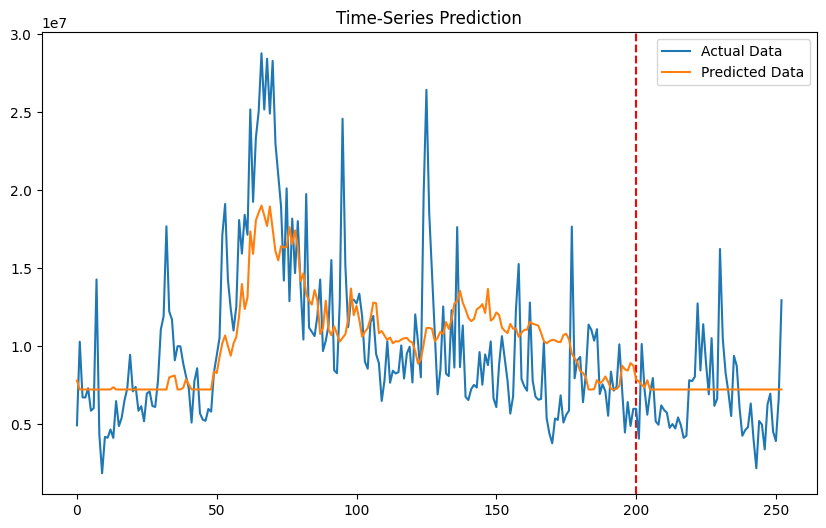

In [23]:
# (코드 7-73) 모델 예측 결과 출력
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# 양방향 LSTM

In [27]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [29]:
data=pd.read_csv('/content/SBUX.csv')
print(data.dtypes)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Volume'] = data['Volume'].astype(float)

X=data.iloc[:,:-1]
y=data.iloc[:,5:6]
print(X)
print(y)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [31]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [32]:
# (코드 7-75) 모델의 네트워크
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True)
        self.fc =  nn.Linear(hidden_size*2, num_classes)
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        out = self.relu(out)
        return out

In [36]:
# (코드 7-76) 모델 학습
num_epochs = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [37]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()

    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.14077
Epoch: 100, loss: 0.13776
Epoch: 200, loss: 0.13466
Epoch: 300, loss: 0.13236
Epoch: 400, loss: 0.13108
Epoch: 500, loss: 0.13026
Epoch: 600, loss: 0.12977
Epoch: 700, loss: 0.12939
Epoch: 800, loss: 0.12902
Epoch: 900, loss: 0.12866


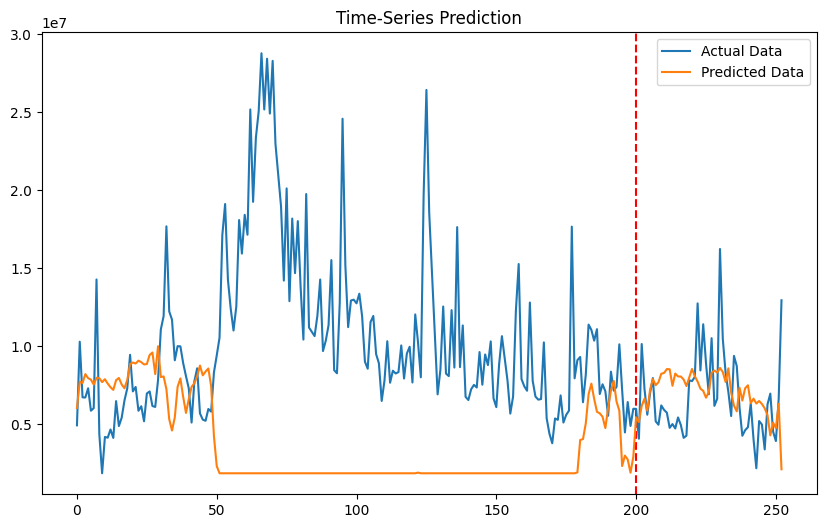

In [38]:
# (코드 7-77) 모델 평가
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()